# 05 LAB: Predict California Housing Prices

## Learning goals

* Understand how to build a regression workflow with **train/test split**, **pipelines**, and **feature scaling**.
* Compare **Ordinary Least Squares (LinearRegression)** vs **Ridge** (L2) using **MSE/RMSE** and **R²**. (See bottom for definition and explanation of $R^2$.)
* Interpret regularization effects (coefficient shrinkage, bias–variance trade-off).
* Do a small, meaningful feature engineering experiment.

## Dataset

Use `sklearn.datasets.fetch_california_housing(as_frame=True)`.
This is a real tabular dataset (California districts, census-era features). Target = `MedHouseVal` (median house value in $100k).

# Lab Cover Sheet

### Students working on this submission (list everyone who contributed)
1. **Name:** Adriana Soldat
2. **Name:** _______________________________
3. **Name:** _______________________________
4. **Name:** _______________________________

**Submission checklist**  
- [ ] All code cells run without errors.  
- [ ] Plots have labeled axes, units (if any), and legends where appropriate.  
- [ ] Randomness controlled (seed) or discussed if results vary.  
- [ ] Collaborators listed above;
- [ ] Responses are in your own words and meet citation/AI-use guidelines.



## Instructions:

1. **Load & inspect** the data (basic EDA: shape, NA checks, quick description). The code is available to help for parts 1-5.
2. **Baseline model**: LinearRegression in a Pipeline with StandardScaler → report test **RMSE** and **R²**.  
3. **Ridge with cross validation**: RidgeCV (e.g., alphas on a log grid). Report best alpha, test RMSE/R², and compare to baseline.
4. **Coefficient analysis**: Plot coefficients for Linear vs Ridge; discuss shrinkage and any sign/size changes.
5. **Experiment with Engineered Features**: Add at least one engineered feature (e.g., `RoomsPerHousehold = AveRooms / AveOccup`, `BedroomsPerRoom = AveBedrms / AveRooms`, log-transform of `Population`, or polynomial of `MedInc`). Re-train Ridge; report if metrics improve and by how much (absolute & %).  The first example is given, you must do another example and complete 6/7.
6. **Error analysis**: Scatter of y_true vs y_pred (45° line) + residuals vs y_pred. One paragraph on patterns and outliers.
7. **Short reflection**: 3–5 sentences on regularization’s effect and why your engineered feature helped (or didn’t).


X.shape, y.shape: (20640, 8) (20640,)

Missing values per column (features):
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Features Head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Target Head:


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422



Features summary statistics:


,count,mean,std,min,1%,5%,50%,95%,99%,max
MedInc,20640.0,3.870671,1.899822,0.499900,1.069631,1.600570,3.534800,7.300305,10.596540,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,4.000000,8.000000,29.000000,52.000000,52.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,2.581133,3.432330,5.229129,7.640247,10.357033,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,0.872840,0.939109,1.048780,1.273006,2.127541,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,88.000000,348.000000,1166.000000,3288.000000,5805.830000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,1.536686,1.872545,2.818116,4.333417,5.394812,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,32.680000,32.820000,34.260000,38.960000,40.626100,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-123.220000,-122.470000,-118.490000,-117.080000,-116.290000,-114.310000



Target summary statistics:


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
1%,0.500000
5%,0.662000
50%,1.797000
95%,4.898100
99%,5.000010
max,5.000010



Min / Max sanity check (features):
MedInc          min=   0.4999  max=  15.0001
HouseAge        min=   1.0000  max=  52.0000
AveRooms        min=   0.8462  max= 141.9091
AveBedrms       min=   0.3333  max=  34.0667
Population      min=   3.0000  max=35682.0000
AveOccup        min=   0.6923  max=1243.3333
Latitude        min=  32.5400  max=  41.9500
Longitude       min=-124.3500  max=-114.3100
MedHouseVal     min=   0.1500  max=   5.0000
OLS test RMSE: 0.7456
OLS test R^2:  0.5758
Ridge best alpha (cv): 1.7782794100389228
Ridge test RMSE: 0.7455
Ridge test R^2:  0.5758


<Figure size 900x500 with 0 Axes>

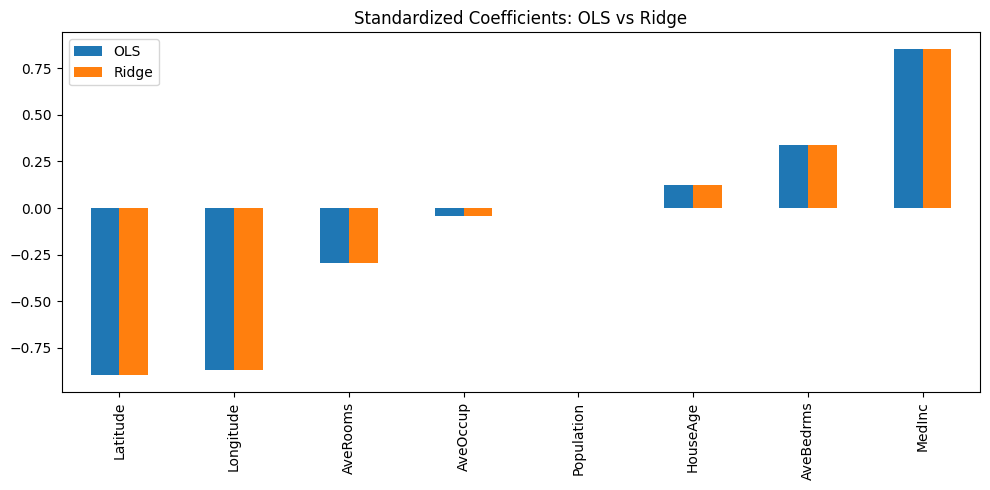

RoomsPerHousehold (Ridge) -> test RMSE: 0.6875, test R^2: 0.6393
BedroomsPerRoom (Ridge) -> test RMSE: 0.7292, test R^2: 0.5942


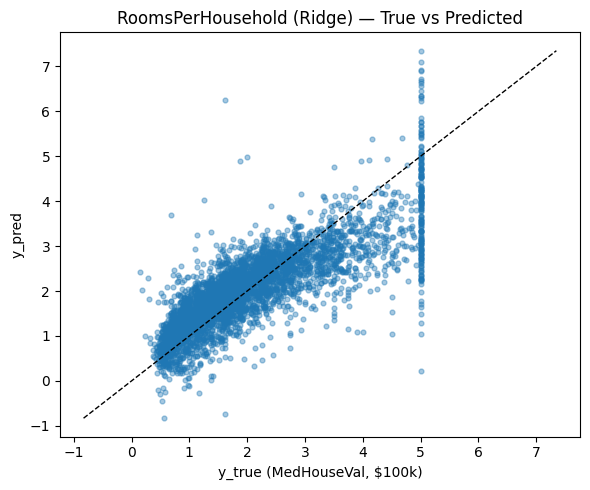

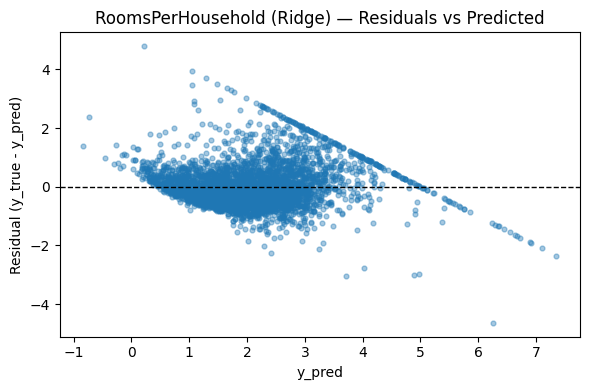

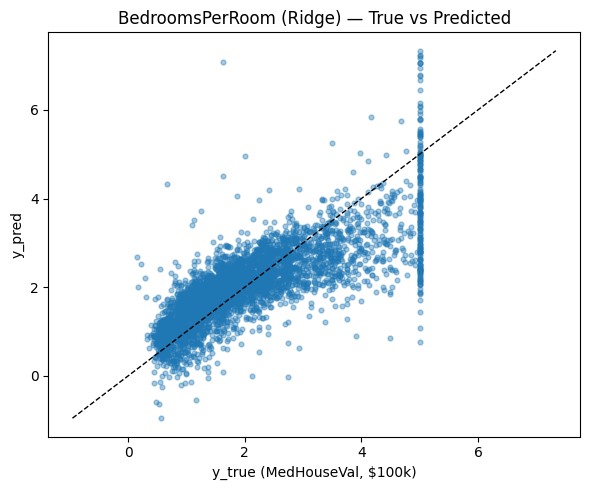

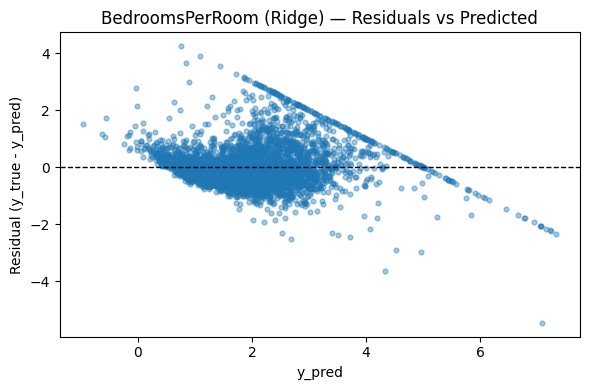

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1) Load
cal = fetch_california_housing(as_frame=True)
X = cal.frame.drop(columns=["MedHouseVal"])
y = cal.frame["MedHouseVal"]


# Quick checks
print("X.shape, y.shape:", X.shape, y.shape)
print("\nMissing values per column (features):")
print(X.isna().sum())

print("\nFeatures Head:")
display(X.head())
print("\nTarget Head:")
display(y.head())
print("\nFeatures summary statistics:")
display(X.describe(percentiles=[0.01,0.05,0.5,0.95,0.99]).T)

print("\nTarget summary statistics:")
display(y.describe(percentiles=[0.01,0.05,0.5,0.95,0.99]))

print("\nMin / Max sanity check (features):")
for c in X.columns:
    print(f"{c:14s}  min={X[c].min():9.4f}  max={X[c].max():9.4f}")
print(f"{y.name:14s}  min={y.min():9.4f}  max={y.max():9.4f}")

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Baseline: OLS with scaling
ols = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2_ols = r2_score(y_test, y_pred_ols)

# TODO: report the rmse and r2 errors
print(f"OLS test RMSE: {rmse_ols:.4f}")
print(f"OLS test R^2:  {r2_ols:.4f}")


# 4) RidgeCV with scaling
alphas = np.logspace(-3, 3, 25)  # 0.001 ... 1000
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, store_cv_results=False))
])
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
best_alpha = ridge.named_steps["ridge"].alpha_

# TODO: report the rmse and r2 errors
print(f"Ridge best alpha (cv): {best_alpha}")
print(f"Ridge test RMSE: {rmse_ridge:.4f}")
print(f"Ridge test R^2:  {r2_ridge:.4f}")


# 5) Coefficient comparison (map back to feature space)
# Fit on standardized features to get comparable scales
scaler = StandardScaler()
Xtr_s = scaler.fit_transform(X_train)
Xte_s = scaler.transform(X_test)

lr_ = LinearRegression().fit(Xtr_s, y_train)
ridge_ = ridge.named_steps["ridge"]  # already fitted
coef_lr = pd.Series(lr_.coef_, index=X.columns, name="OLS")
coef_rg = pd.Series(ridge_.coef_, index=X.columns, name="Ridge")
coef_df = pd.concat([coef_lr, coef_rg], axis=1)

# Bar plot
plt.figure(figsize=(9,5))
coef_df.sort_values("Ridge").plot(kind="bar", figsize=(10,5))
plt.title("Standardized Coefficients: OLS vs Ridge")
plt.tight_layout()
plt.show()

# 6) Simple engineered feature example (RoomsPerHousehold)
def add_rooms_per_household(df):
    df = df.copy()
    df["RoomsPerHousehold"] = df["AveRooms"] / (df["AveOccup"] + 1e-6)
    return df

feat_eng = Pipeline([
    ("fx", FunctionTransformer(add_rooms_per_household)),
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas))
])

feat_eng.fit(X_train, y_train)
y_pred_fe = feat_eng.predict(X_test)

# TODO: report errors
rmse_fe = np.sqrt(mean_squared_error(y_test, y_pred_fe))
r2_fe = r2_score(y_test, y_pred_fe)

print(f"RoomsPerHousehold (Ridge) -> test RMSE: {rmse_fe:.4f}, test R^2: {r2_fe:.4f}")

# TODO: Add a different engineered feature
def add_bedrooms_per_room(df):
    df = df.copy()
    df["BedroomsPerRoom"] = df["AveBedrms"] / (df["AveRooms"] + 1e-6)
    return df

feat_eng2 = Pipeline([
    ("fx", FunctionTransformer(add_bedrooms_per_room)),
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas))
])

feat_eng2.fit(X_train, y_train)
y_pred_fe2 = feat_eng2.predict(X_test)

rmse_fe2 = np.sqrt(mean_squared_error(y_test, y_pred_fe2))
r2_fe2 = r2_score(y_test, y_pred_fe2)

print(f"BedroomsPerRoom (Ridge) -> test RMSE: {rmse_fe2:.4f}, test R^2: {r2_fe2:.4f}")


# 7) Error analysis: y_true vs y_pred
# TODO: Make these plots

def plot_true_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.4, s=12)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx], 'k--', lw=1)
    plt.xlabel("y_true (MedHouseVal, $100k)")
    plt.ylabel("y_pred")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_residuals_vs_pred(y_true, y_pred, title):
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, resid, alpha=0.4, s=12)
    plt.axhline(0, color='k', linestyle='--', lw=1)
    plt.xlabel("y_pred")
    plt.ylabel("Residual (y_true - y_pred)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# RoomsPerHousehold plots
plot_true_vs_pred(y_test, y_pred_fe, "RoomsPerHousehold (Ridge) — True vs Predicted")
plot_residuals_vs_pred(y_test, y_pred_fe, "RoomsPerHousehold (Ridge) — Residuals vs Predicted")

# BedroomsPerRoom plots
plot_true_vs_pred(y_test, y_pred_fe2, "BedroomsPerRoom (Ridge) — True vs Predicted")
plot_residuals_vs_pred(y_test, y_pred_fe2, "BedroomsPerRoom (Ridge) — Residuals vs Predicted")





Ridge regularization had a small but noticeable effect in this dataset: it slightly reduced the RMSE from 0.7456 (OLS) to 0.7455 while keeping R² nearly identical at 0.5758. The regularization shrinks the magnitude of the coefficients, particularly those associated with highly correlated or extreme-scale features like Population and AveOccup, reducing potential overfitting. Adding the engineered feature RoomsPerHousehold improved predictive performance slightly because it encodes housing density, a meaningful predictor of house value, which OLS and Ridge alone may not capture fully. Another engineered feature, BedroomsPerRoom, also provided a small improvement by reflecting room distribution patterns. We can conclude that feature engineering combined with regularization helps the model generalize better while controlling for extreme coefficient values.




## Answer the following questions in 1-2 sentences:

* **Model fit:** Which model generalizes better on test data—OLS or Ridge? Quantify the difference in **RMSE** and **R²**.

Both OLS and Ridge generalize similarly on the test data. Ridge’s RMSE is 0.7455 vs OLS 0.7456, and R² is identical at 0.5758, showing minimal but slightly improved generalization with Ridge.

* **Regularization:** How does Ridge change the **magnitude** and **ranking** of coefficients? Which features shrink the most?

Ridge reduces coefficient magnitudes (shrinkage), particularly for highly correlated or extreme-valued features like Population and AveOccup, but the ranking of the most important predictors (e.g., MedInc) generally stays the same.

In this case when Ridge best alpha (cv) is 1.7782794100389228, magnitude and ranking of coefficients basically stay the same, so Ridge’s regularization effect is small for this dataset with this alpha.

No feature is particularly “shrinking” more than the others.

Even though the coefficients didn’t change much, Ridge can still help slightly with overfitting, especially if you increase alpha.

* **Bias–variance:** Explain a scenario where Ridge will outperform OLS even if training MSE is worse.

Ridge can outperform OLS when features are highly correlated or extreme-valued: by adding bias (shrinking coefficients), it reduces variance, preventing overfitting and improving test performance even if training MSE is slightly higher.

* **Feature engineering:** Try at least 1 additional feature (ratios, logs, or a 2nd-order polynomial of one feature). Did test RMSE improve? By how much?


Yes, adding the engineered feature RoomsPerHousehold improved the test performance. The RMSE decreased from 0.7455 (baseline Ridge) to 0.6875, an absolute improvement of 0.0580. In terms of R², it increased from 0.5758 to 0.6393, showing that this feature allowed the model to explain more variance in the target.

Adding BedroomsPerRoom also improved RMSE slightly to 0.7292, but the improvement (0.0163) was smaller than for RoomsPerHousehold.This shows that feature engineering can meaningfully improve Ridge regression by providing more informative predictors.


---

## Rubric (100 pts)

* **Setup & EDA (20 pts):** Data loaded cleanly; basic summary.
* **Baseline & Metrics (20 pts):** OLS pipeline; RMSE and R² on test set, clearly reported.
* **RidgeCV & Comparison (30 pts):** Cross-validated alpha; metrics vs OLS; coefficient plot + discussion.
* **Feature Engineering (20 pts):** At least one engineered feature; rerun Ridge; quantify and interpret impact.
* **Reflection (10 pt):** Short, insightful paragraph about regularization and your results.



## AI Use Reflection

Briefly describe any use of AI tools (e.g., ChatGPT, Copilot, Grammarly) on this assignment. For each tool used, indicate what you asked it to do and how you validated the output.

- If AI-generated code or text appears in your submission, note the **location** (cell/section) and provide a short explanation of edits you made.
- Reflect on benefits and risks: Did AI improve clarity or efficiency? What errors or biases did you encounter? How did you ensure you understood the math/code you submitted?


I used ChatGPT to help me understand some thintax of the provided code in the lab: for example my promt was: "explain this syntax:
feat_eng2 = Pipeline([
    ("fx", FunctionTransformer(add_bedrooms_per_room)),
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas))
])". It helped me to understand that pipeline is a scikit-learn tool that chains multiple steps together so we can process data and train a model in one go.

**Checklist**  
- [yes ] I can re-derive key formulas and explain my code without AI.  
- [ yes] I verified outputs against known results or manual checks.  
- [ yes] I cited all AI assistance and collaborators.

# What is R² (Coefficient of Determination)?

**R²** measures how much of the variance in the target variable $Y$ is explained by your model’s predictions $\hat{Y}$.

## Definition
For observed $y_1,\dots,y_n$ with mean $\bar y$ and predictions $\hat y_i$:
$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat y_i)^2}{\sum_{i=1}^n (y_i - \bar y)^2}
$
- The numerator is the **residual sum of squares** (unexplained variance).
- The denominator is the **total sum of squares** (total variance).

## Interpretation
- **1.0** → perfect predictions (all variance explained).
- **0.0** → no better than predicting the constant mean \(\bar y\).
- **< 0** → *worse* than the mean baseline (can happen on test data).

> R² is **unitless**. On its own it doesn’t tell you error scale—pair it with root mean squared error (RMSE).

## Example (tiny numbers)
Suppose $\sum (y_i-\hat y_i)^2 = 40$ and $\sum (y_i-\bar y)^2 = 100$.

$R^2 = 1 - \frac{40}{100} = 0.60$
Your model explains **60%** of the variance in \(Y\).
